In [1]:
from bike_demand.data.load_data import load_data
import pandas as pd
df_raw = load_data()
df_raw.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [2]:
# 1. Basic information
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [3]:
df_raw.describe().T


,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


# 2. 目标变量分布（Demand）

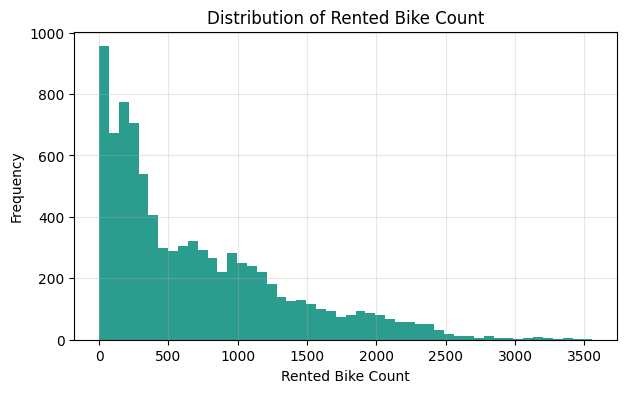

In [4]:

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.hist(df_raw["Rented Bike Count"], bins=50, color="#2a9d8f")
plt.title("Distribution of Rented Bike Count")
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


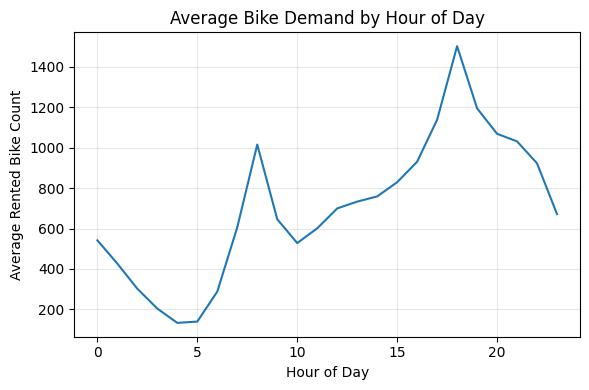

In [5]:
# Step 3：Time-related structure
hourly_avg = df_raw.groupby("Hour")["Rented Bike Count"].mean()

plt.figure(figsize=(6, 4))
hourly_avg.plot()
plt.xlabel("Hour of Day")
plt.ylabel("Average Rented Bike Count")
plt.title("Average Bike Demand by Hour of Day")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




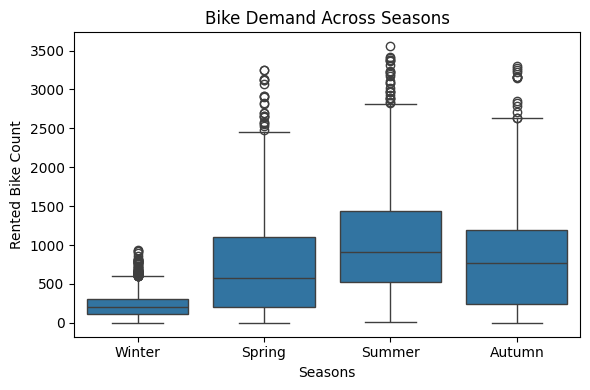

In [6]:
#3.2 Seasonal effects（你已经有 categorical）
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(data=df_raw, x="Seasons", y="Rented Bike Count")
plt.title("Bike Demand Across Seasons")
plt.tight_layout()
plt.show()


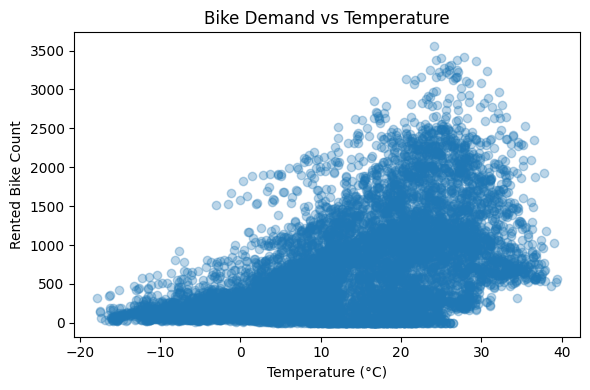

In [7]:
#EDA · Step 4：Weather variables（连续变量）
#4.1 Temperature（你数据里最强解释变量之一）
plt.figure(figsize=(6, 4))
plt.scatter(
    df_raw["Temperature(°C)"],
    df_raw["Rented Bike Count"],
    alpha=0.3
)
plt.xlabel("Temperature (°C)")
plt.ylabel("Rented Bike Count")
plt.title("Bike Demand vs Temperature")
plt.tight_layout()
plt.show()


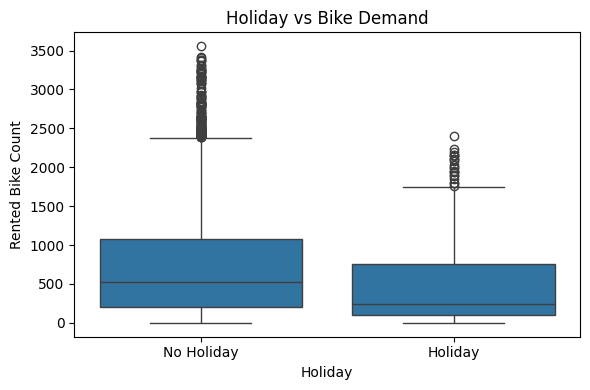

In [8]:
#4.2 Rainfall & Snowfall（解释“零膨胀”）
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_raw, x="Holiday", y="Rented Bike Count")
plt.title("Holiday vs Bike Demand")
plt.tight_layout()
plt.show()


In [9]:
from bike_demand.data.load_data import load_data
from bike_demand.data.preprocessing import clean_seoul_bike_data

df_raw = load_data()
df_clean = clean_seoul_bike_data(df_raw)

df_clean.info()
df_clean.to_parquet("../data/processed/seoul_bike_cleaned.parquet")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    8760 non-null   datetime64[ns]
 1   rented_bike_count       8760 non-null   int64         
 2   hour                    8760 non-null   int64         
 3   temperaturec            8760 non-null   float64       
 4   humidity%               8760 non-null   int64         
 5   wind_speed_m_s          8760 non-null   float64       
 6   visibility_10m          8760 non-null   int64         
 7   dew_point_temperaturec  8760 non-null   float64       
 8   solar_radiation_mj_m2   8760 non-null   float64       
 9   rainfallmm              8760 non-null   float64       
 10  snowfall_cm             8760 non-null   float64       
 11  seasons                 8760 non-null   category      
 12  holiday                 8760 non-null   category